# Tugas Pertemuan 2 - Pre-Processing Data Berita detik.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/data_berita_detik.csv")
df.head(6)

,judul,tanggal,isi,kategori
0,"Sulit Kejar Marc Marquez, Bagnaia Belum Fit 10...","Senin, 09 Sep 2024 14:30 WIB",Jakarta - Marc Marquez jadi kampiun di MotoGP ...,Olahraga
1,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga
2,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"2,968 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga
3,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga
4,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"3,413 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga
5,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [ ]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,tanggal,isi,kategori,cleansing
0,"Sulit Kejar Marc Marquez, Bagnaia Belum Fit 10...","Senin, 09 Sep 2024 14:30 WIB",Jakarta - Marc Marquez jadi kampiun di MotoGP ...,Olahraga,Jakarta Marc Marquez jadi kampiun di MotoGP S...
1,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...
2,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"2,968 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...
3,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...
4,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"3,413 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...
5,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [ ]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding
0,"Sulit Kejar Marc Marquez, Bagnaia Belum Fit 10...","Senin, 09 Sep 2024 14:30 WIB",Jakarta - Marc Marquez jadi kampiun di MotoGP ...,Olahraga,Jakarta Marc Marquez jadi kampiun di MotoGP S...,jakarta marc marquez jadi kampiun di motogp s...
1,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...
2,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"2,968 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...
3,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...
4,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"3,413 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...
5,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize
0,"Sulit Kejar Marc Marquez, Bagnaia Belum Fit 10...","Senin, 09 Sep 2024 14:30 WIB",Jakarta - Marc Marquez jadi kampiun di MotoGP ...,Olahraga,Jakarta Marc Marquez jadi kampiun di MotoGP S...,jakarta marc marquez jadi kampiun di motogp s...,"[jakarta, marc, marquez, jadi, kampiun, di, mo..."
1,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...,"[uganda, pelari, maraton, olimpiade, uganda, r..."
2,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"2,968 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...,"[presiden, joko, widodo, jokowi, meresmikan, p..."
3,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...,"[jakarta, jorge, martin, cuma, finis, ke, di, ..."
4,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"3,413 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...,"[marc, marquez, tak, menduga, dia, bakal, meme..."
5,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...,"[prancis, paralimpiade, paris, resmi, berakhir..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yaitu langkah untuk memilih kata-kata yang  dianggap tidak penting atau  tidak relevan, untuk mengetahui kata-kata mana yang tidak relevan berdasarkan daftar stopword removal yang digunakan.



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,"Sulit Kejar Marc Marquez, Bagnaia Belum Fit 10...","Senin, 09 Sep 2024 14:30 WIB",Jakarta - Marc Marquez jadi kampiun di MotoGP ...,Olahraga,Jakarta Marc Marquez jadi kampiun di MotoGP S...,jakarta marc marquez jadi kampiun di motogp s...,"[jakarta, marc, marquez, jadi, kampiun, di, mo...",jakarta marc marquez kampiun motogp san marino...
1,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...,"[uganda, pelari, maraton, olimpiade, uganda, r...",uganda pelari maraton olimpiade uganda rebecca...
2,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"2,968 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...,"[presiden, joko, widodo, jokowi, meresmikan, p...",presiden joko widodo jokowi meresmikan pembang...
3,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...,"[jakarta, jorge, martin, cuma, finis, ke, di, ...",jakarta jorge martin finis motogp san marino k...
4,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"3,413 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...,"[marc, marquez, tak, menduga, dia, bakal, meme...",marc marquez menduga memenangi motogp san mari...
5,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...,"[prancis, paralimpiade, paris, resmi, berakhir...",prancis paralimpiade paris resmi merah putih m...


In [ ]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** Ubah dokumen teks apa pun menjadi vektor yang berisi  frekuensi  setiap kata dalam dokumen. Pembobotan TF-IDF menghitung nilai bobot untuk setiap kata di setiap dokumen. Ini dibagi menjadi dua proses

yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung  kemunculan setiap kata dalam dokumen,  dan jika sebuah kata memiliki kemunculan  terbanyak,  kata tersebut memiliki nilai tertinggi.

**IDF (Inverse Document Frequency)** Hitung jumlah dokumen untuk setiap kata dengan nilai tertinggi yang  jarang muncul dalam dokumen.
 Jika kata  sering muncul di dokumen, hasilnya akan bernilai kecil.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv", sep=",")

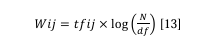

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [ ]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aa,abaaba,abadi,abang,abnormal,abon,abuabu,academy,acar,acara,...,zaeni,zaitun,zakaria,zakariaaura,zarco,zat,zeaxanthin,zilazik,zita,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.046412,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038278,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
